In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [2]:
df = pd.read_csv("data/HR_comma_sep.csv")

In [3]:
df.shape

(14999, 10)

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
numeric_cols = df.describe().columns
df[numeric_cols].groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


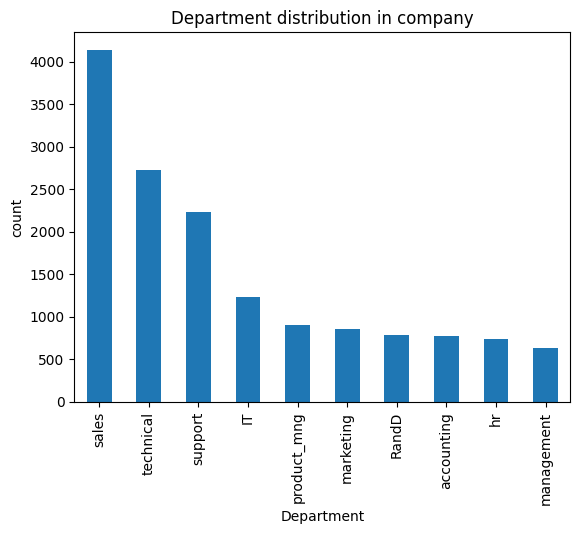

In [7]:
df.Department.value_counts().plot(kind="bar")
plt.xlabel('Department')
plt.ylabel('count')
plt.title('Department distribution in company')
plt.show()

Text(0.5, 1.0, 'Department vs retention in company')

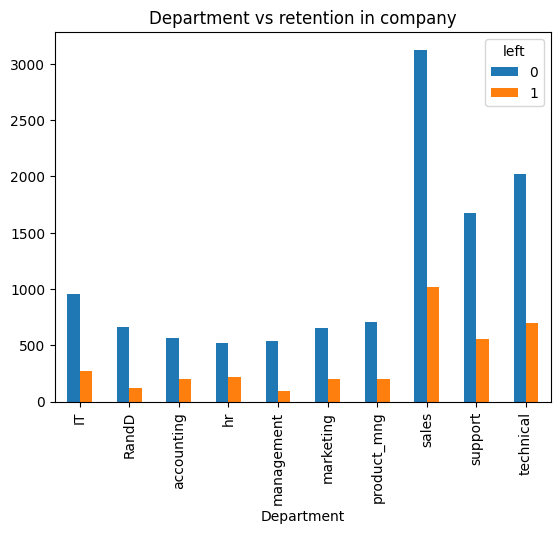

In [8]:
pd.crosstab(df['Department'], df['left']).plot(kind='bar')
plt.title("Department vs retention in company")

Text(0.5, 1.0, 'Impact of wages on retention in company')

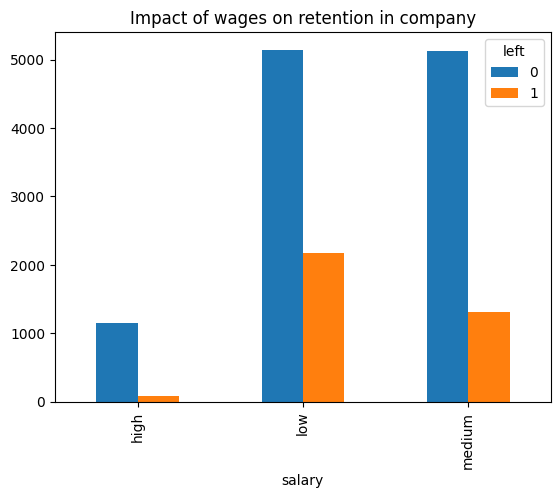

In [9]:
pd.crosstab(df['salary'], df['left']).plot(kind='bar')
plt.title("Impact of wages on retention in company")

<Axes: ylabel='count'>

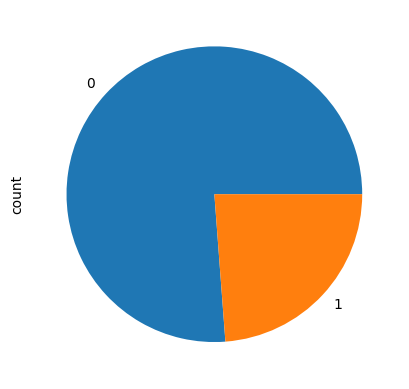

In [10]:
df.left.value_counts().plot(kind='pie')

Text(0.5, 1.0, 'Promotion stats')

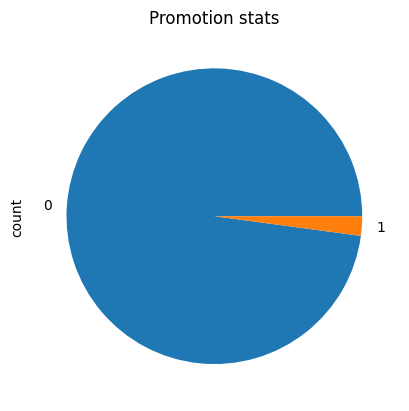

In [11]:
df['promotion_last_5years'].value_counts().plot(kind='pie')
plt.title("Promotion stats")

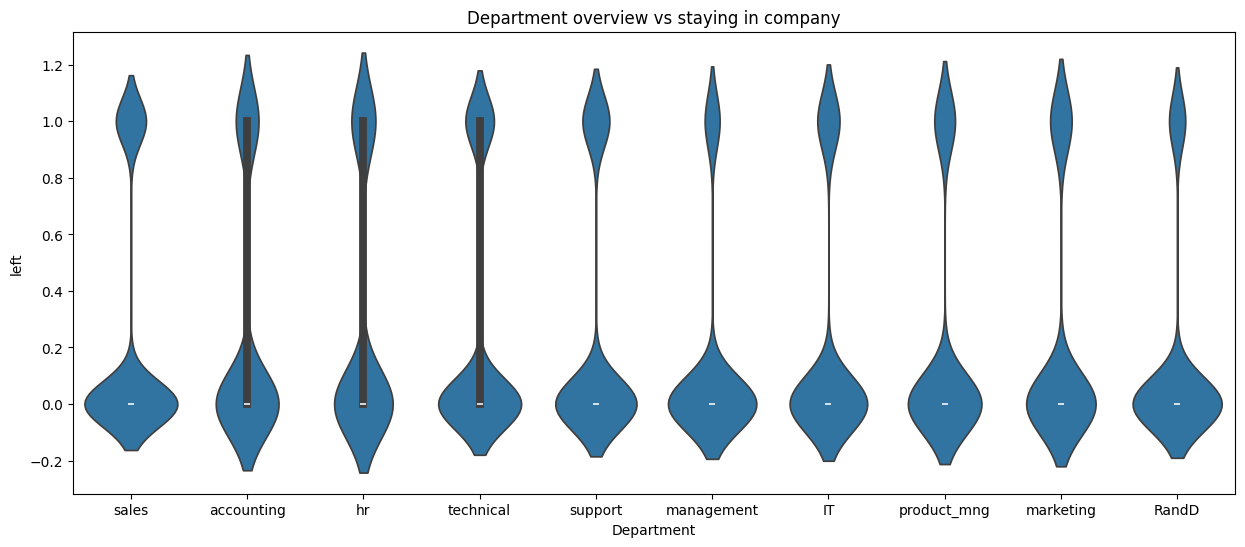

In [12]:
plt.figure(figsize=(15,6))
sns.violinplot(x="Department", y="left", data=df)
plt.xlabel('Department')
plt.ylabel('left')
plt.title('Department overview vs staying in company')
plt.show()

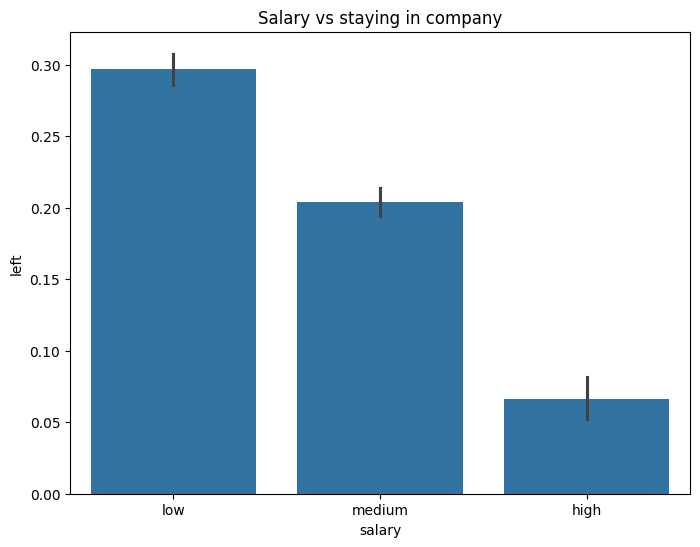

In [13]:
plt.figure(figsize=(8,6))
sns.barplot(x="salary", y="left", data=df)
plt.xlabel('salary')
plt.ylabel('left')
plt.title('Salary vs staying in company')
plt.show()

In [14]:
ohe = OneHotEncoder(drop="first", sparse_output=False)

In [15]:
encoded_array = ohe.fit_transform(df[['Department', 'salary']])

In [16]:
encoded_array

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], shape=(14999, 11))

In [17]:
df_encoded_features = pd.DataFrame(encoded_array, columns= ohe.get_feature_names_out(['Department', 'salary']))
df_encoded_features.shape

(14999, 11)

In [18]:
df_final = pd.concat([df, df_encoded_features], axis=1)

In [19]:
df_final.shape

(14999, 21)

In [20]:
df_final = df_final.drop(['Department', 'salary'], axis=1)
df_final.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department_RandD', 'Department_accounting',
       'Department_hr', 'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [21]:
y_col = 'left'
x_cols = [col for col in df_final.columns if col != y_col]

In [22]:
df_final.isna().sum()

satisfaction_level        0
last_evaluation           0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
Department_RandD          0
Department_accounting     0
Department_hr             0
Department_management     0
Department_marketing      0
Department_product_mng    0
Department_sales          0
Department_support        0
Department_technical      0
salary_low                0
salary_medium             0
dtype: int64

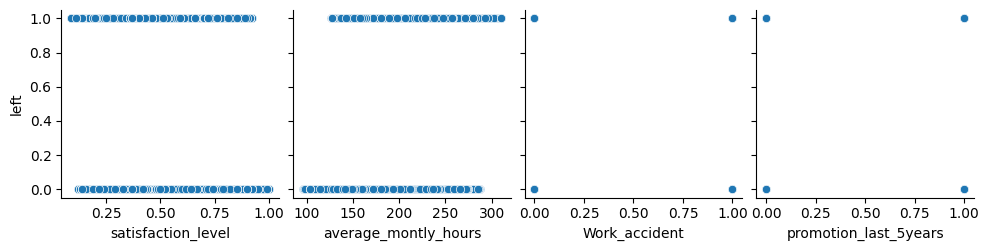

In [23]:
sns.pairplot(df_final, x_vars=['satisfaction_level', 'average_montly_hours', 'Work_accident', 'promotion_last_5years'], y_vars=y_col)
plt.show()

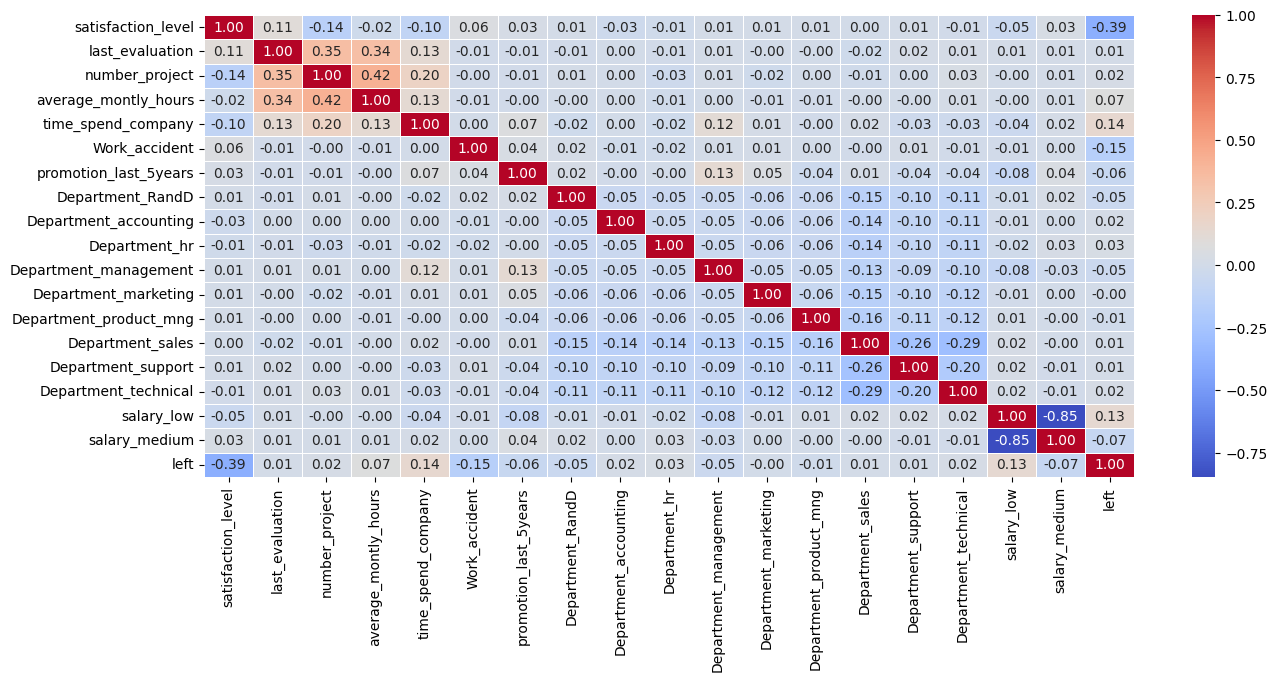

In [24]:
plt.figure(figsize=(15,6))
sns.heatmap(df_final[x_cols+[y_col]].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [25]:
x_train, x_test, y_train, y_test = train_test_split(df_final[['satisfaction_level', 'average_montly_hours', 'Work_accident', 'promotion_last_5years', 'salary_low', 'salary_medium']], df_final['left'], test_size=0.3, random_state=42)
len(x_train), len(x_test), len(y_train), len(y_test)

(10499, 4500, 10499, 4500)

In [26]:
reg = linear_model.LogisticRegression()
reg

LogisticRegression()

In [27]:
reg.fit(x_train, y_train)
reg

LogisticRegression()

In [28]:
print(f"Model training score: {reg.score(x_train, y_train)}")

Model training score: 0.7791218211258215


In [29]:
y_pred = reg.predict(x_test)
print(f"Model test score: {reg.score(x_test, y_test)}")

Model test score: 0.77


In [30]:
#predict_probabilities

In [31]:
reg.predict_proba(x_test)

array([[0.94707477, 0.05292523],
       [0.88330854, 0.11669146],
       [0.76259444, 0.23740556],
       ...,
       [0.84151394, 0.15848606],
       [0.92455969, 0.07544031],
       [0.97676265, 0.02323735]], shape=(4500, 2))

In [32]:
import joblib
joblib.dump(reg, 'binary_classification_model')

['binary_classification_model']

In [33]:
model = joblib.load('binary_classification_model')
print(f"Model test score: {model.score(x_test, y_test)}")

Model test score: 0.77


In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[3208,  220],
       [ 815,  257]])

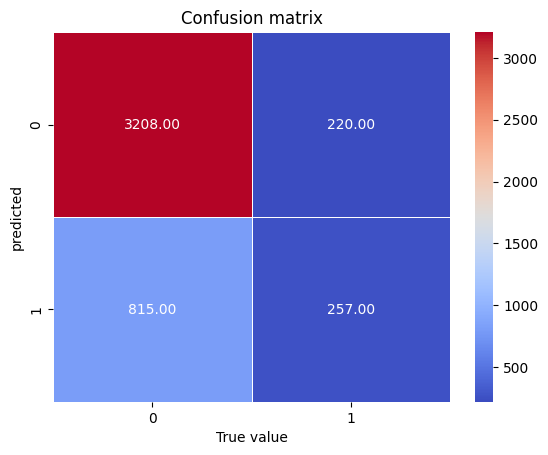

In [36]:
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.xlabel('True value')
plt.ylabel('predicted')
plt.title('Confusion matrix')
plt.show()